In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
sns.set_theme()

In [2]:
df = pd.read_csv("traffic_collisions.csv")

In [3]:
df.columns

Index(['EVENT_UNIQUE_ID', 'DATE', 'MONTH', 'DOW', 'YEAR', 'HOUR', 'DIVISION',
       'FATALITIES', 'INJURY', 'FLED_SCENE', 'PROPERTY_DAMAGE',
       'NEIGHBOURHOOD', 'LONG', 'LAT', 'AUTOMOBILE', 'MOTORCYCLE', 'BICYCLE',
       'PEDESTRIAN'],
      dtype='object')

<Axes: xlabel='YEAR', ylabel='count'>

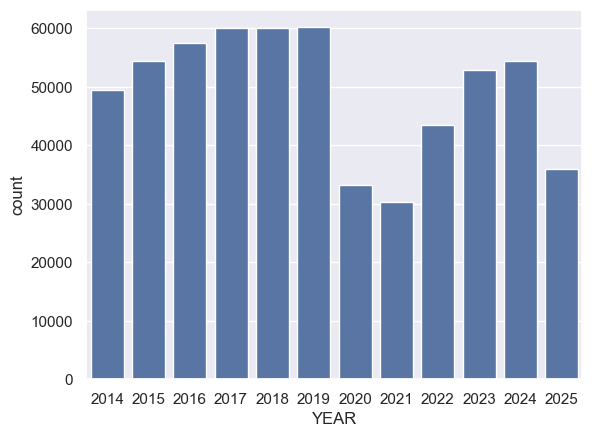

In [4]:
sns.countplot(x="YEAR", data=df)

<Axes: xlabel='HOUR', ylabel='count'>

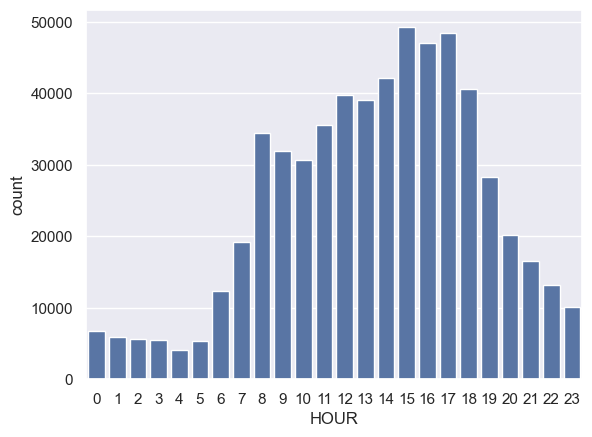

In [5]:
sns.countplot(x="HOUR", data=df)

<Axes: xlabel='DOW', ylabel='count'>

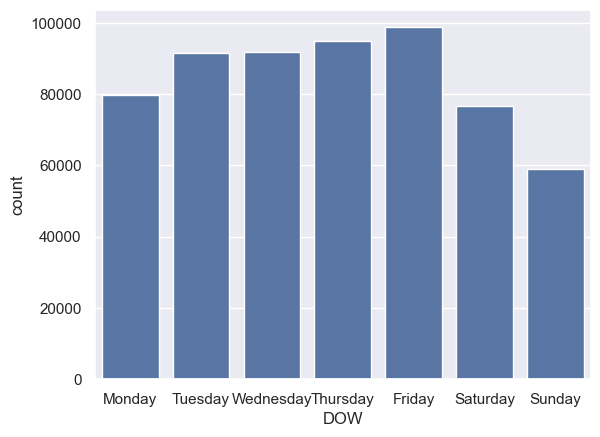

In [6]:
sns.countplot(data=df, x='DOW', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

<Axes: xlabel='MONTH', ylabel='count'>

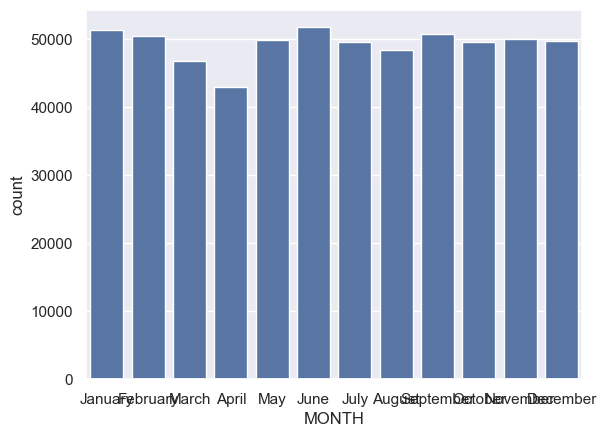

In [7]:
sns.countplot(data=df, x='MONTH')

In [8]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
year_to_plot = 2023
df_year = df[df['DATE'].dt.year == year_to_plot]

#group by day per year
daily = df_year.groupby('DATE').size().reset_index(name='COLLISIONS')

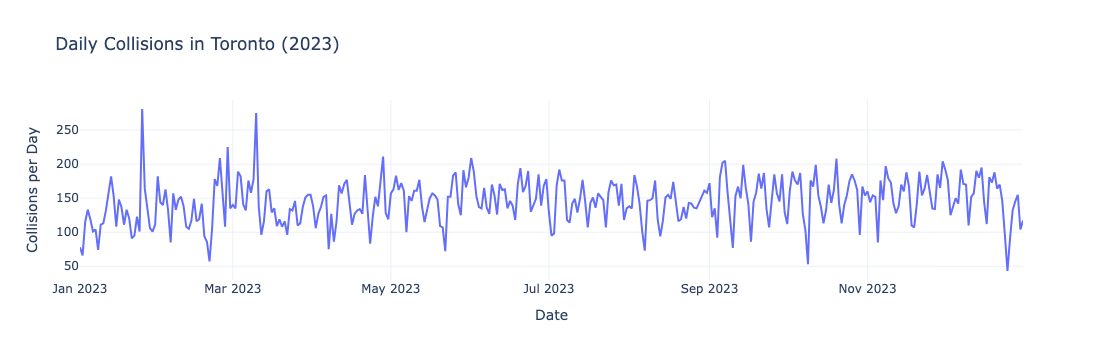

In [10]:
fig = px.line(
    daily,
    x='DATE',
    y='COLLISIONS',
    title=f'Daily Collisions in Toronto ({year_to_plot})',
    labels={'DATE': 'Date', 'COLLISIONS': 'Number of Collisions'},
)

fig.update_layout(
    template='plotly_white',
    hovermode='x unified',
    xaxis_title='Date',
    yaxis_title='Collisions per Day'
)

fig.show()

In [11]:
daily

,DATE,COLLISIONS
0,2023-01-01,78
1,2023-01-02,66
2,2023-01-03,115
3,2023-01-04,133
4,2023-01-05,119
...,...,...
360,2023-12-27,132
361,2023-12-28,145
362,2023-12-29,155
363,2023-12-30,104


In [12]:
df_2024 = df[df['DATE'].dt.year == 2024]
df_2023 = df[df['DATE'].dt.year == 2023]
df_2022 = df[df['DATE'].dt.year == 2022]
df_2021 = df[df['DATE'].dt.year == 2021]
df_2020 = df[df['DATE'].dt.year == 2020]
df_2019 = df[df['DATE'].dt.year == 2019]

<Axes: xlabel='HOUR', ylabel='count'>

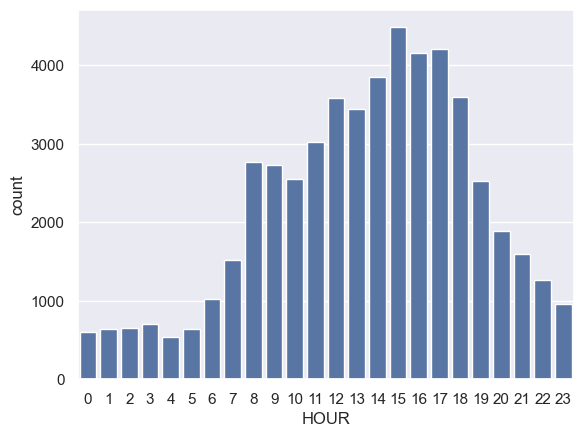

In [13]:
sns.countplot(x='HOUR', data=df_2023)

<Axes: xlabel='HOUR', ylabel='count'>

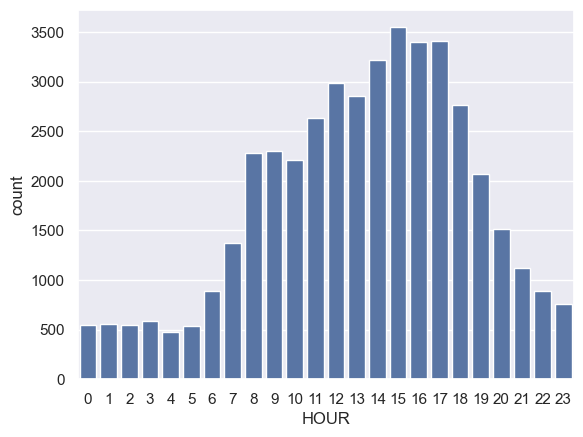

In [14]:
sns.countplot(x='HOUR', data=df_2022)

<Axes: xlabel='HOUR', ylabel='count'>

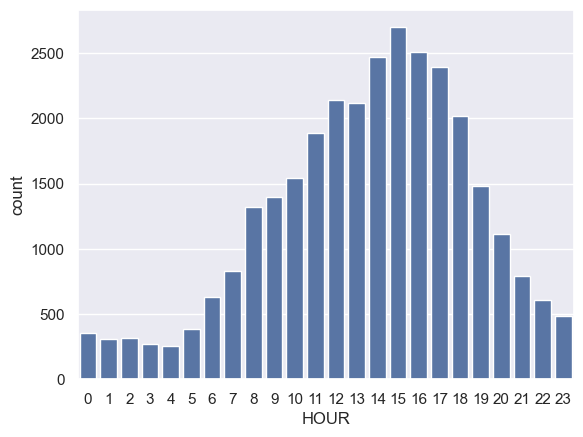

In [15]:
sns.countplot(x='HOUR', data=df_2021)

<Axes: xlabel='HOUR', ylabel='count'>

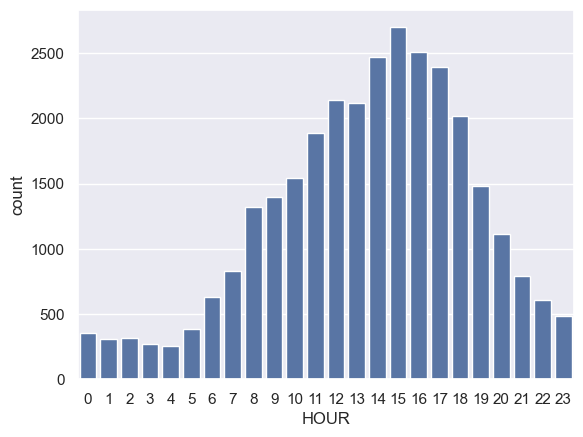

In [16]:
sns.countplot(x='HOUR', data=df_2021)

<Axes: xlabel='INJURY', ylabel='count'>

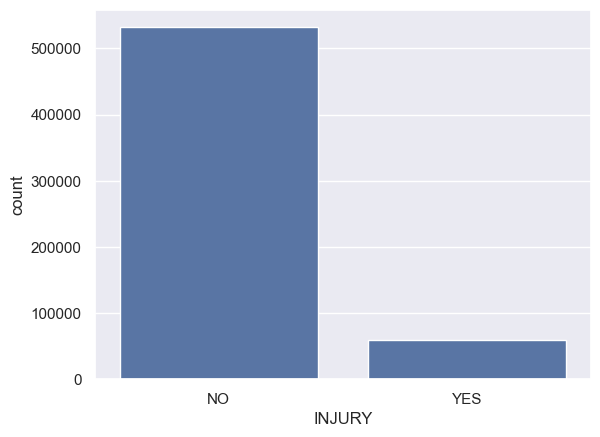

In [17]:
sns.countplot(x='INJURY', data=df)

<Axes: xlabel='PROPERTY_DAMAGE', ylabel='count'>

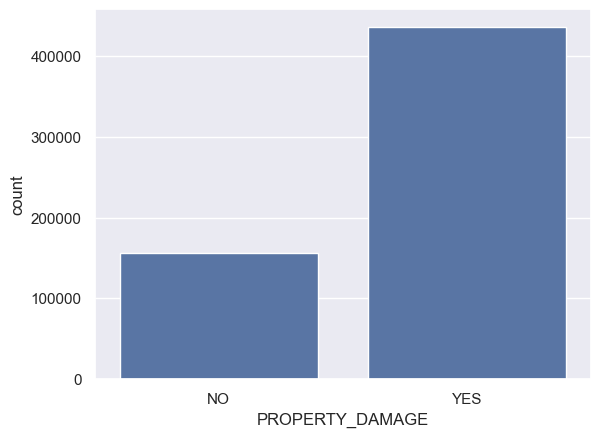

In [18]:
sns.countplot(x='PROPERTY_DAMAGE', data=df)

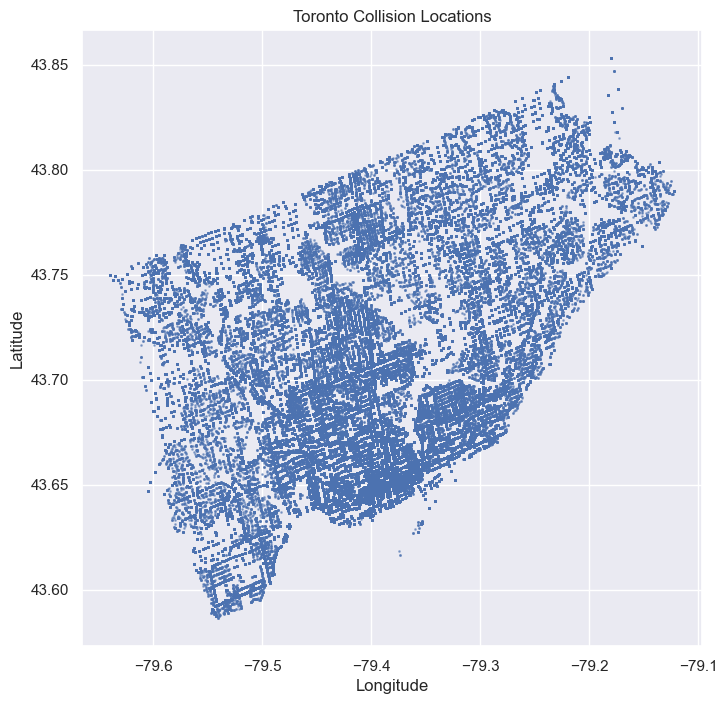

In [19]:
plt.figure(figsize=(8, 8))
plt.scatter(df['LONG'], df['LAT'], s=1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto Collision Locations')
plt.show()

In [20]:
injury_fatal_df = df[(df['FATALITIES'] > 0) | (df['INJURY'] == "YES")]

In [21]:
injury_fatal_df.shape

(60158, 18)

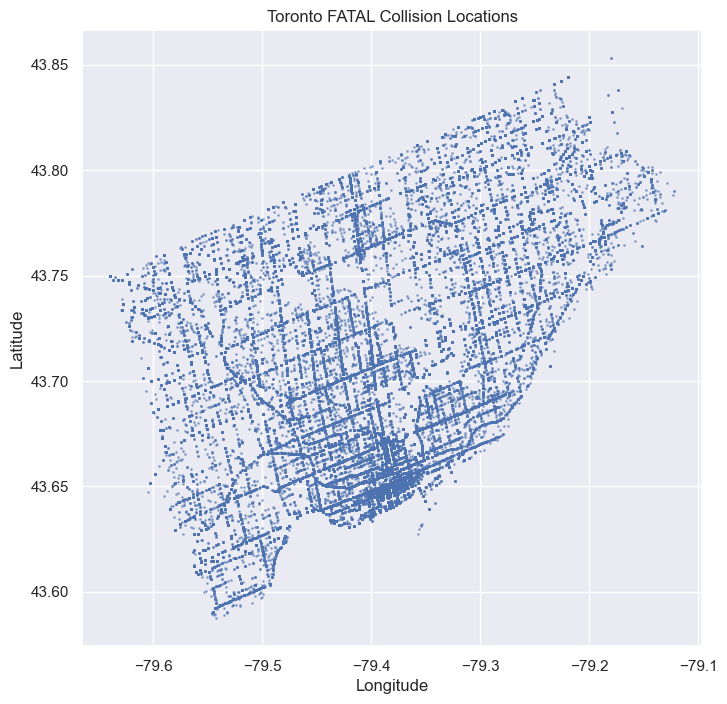

In [22]:
plt.figure(figsize=(8, 8))
plt.scatter(injury_fatal_df['LONG'], injury_fatal_df['LAT'], s=1, alpha=0.5)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Toronto FATAL Collision Locations')
plt.show()

<Axes: xlabel='DIVISION', ylabel='count'>

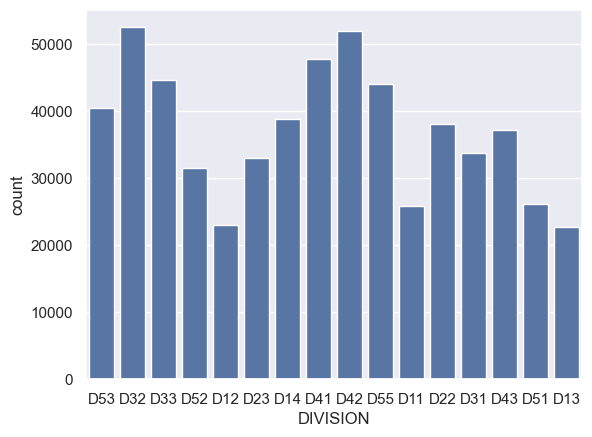

In [23]:
sns.countplot(x="DIVISION", data=df)

In [24]:
df["DIVISION"].value_counts()

DIVISION
D32    52532
D42    52031
D41    47750
D33    44621
D55    44039
D53    40452
D14    38885
D22    38085
D43    37217
D31    33839
D23    32992
D52    31516
D51    26201
D11    25871
D12    23049
D13    22743
Name: count, dtype: int64

In [25]:
df["NEIGHBOURHOOD"].value_counts()

NEIGHBOURHOOD
Wexford/Maryvale (119)                         17163
West Humber-Clairville (1)                     14220
York University Heights (27)                   11667
St Lawrence-East Bayfront-The Islands (166)     9982
Dorset Park (126)                               9680
                                               ...  
Caledonia-Fairbank (109)                        1013
Humewood-Cedarvale (106)                        1004
Guildwood (140)                                  922
Blake-Jones (69)                                 784
Lambton Baby Point (114)                         232
Name: count, Length: 158, dtype: int64

<Axes: xlabel='HOUR', ylabel='count'>

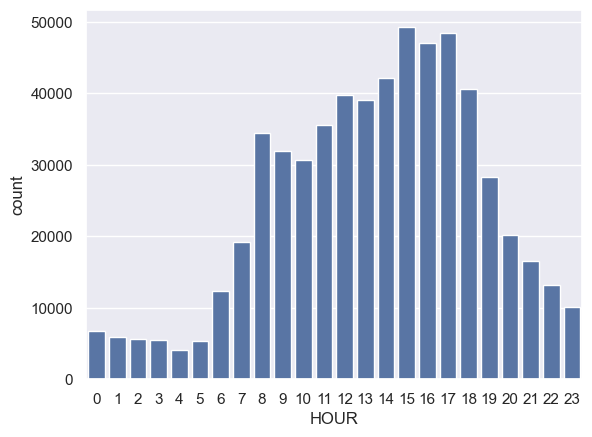

In [26]:
sns.countplot(x='HOUR', data=df)

<Axes: xlabel='HOUR', ylabel='count'>

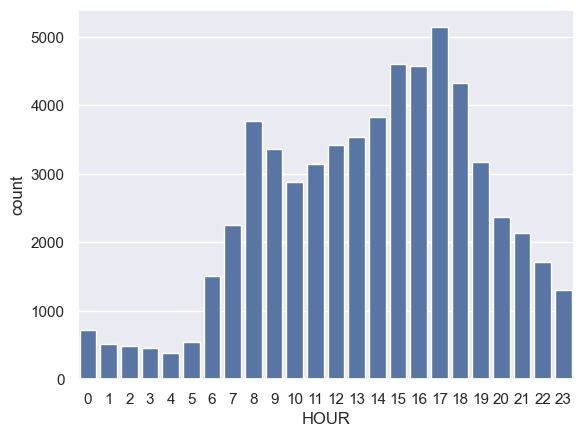

In [27]:
sns.countplot(x='HOUR', data=injury_fatal_df)

<Axes: xlabel='DOW', ylabel='count'>

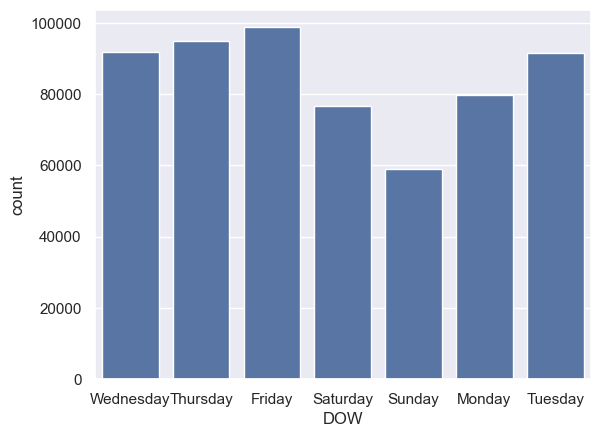

In [28]:
sns.countplot(x='DOW', data=df)

<Axes: xlabel='DOW', ylabel='count'>

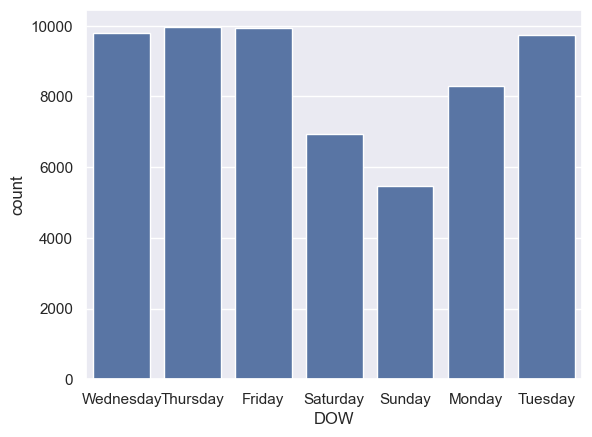

In [29]:
sns.countplot(x='DOW', data=injury_fatal_df)

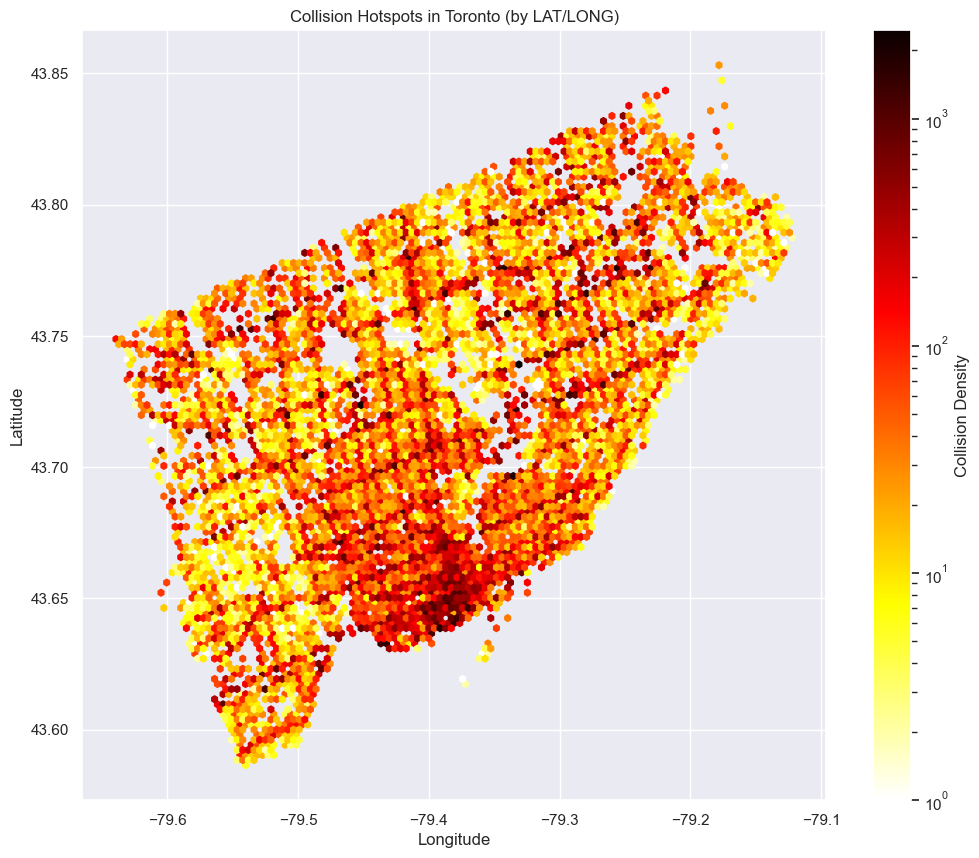

In [30]:
plt.figure(figsize=(12, 10))
plt.hexbin(df['LONG'], df['LAT'], gridsize=120, cmap='hot_r', bins='log')
plt.colorbar(label='Collision Density')
plt.title('Collision Hotspots in Toronto (by LAT/LONG)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

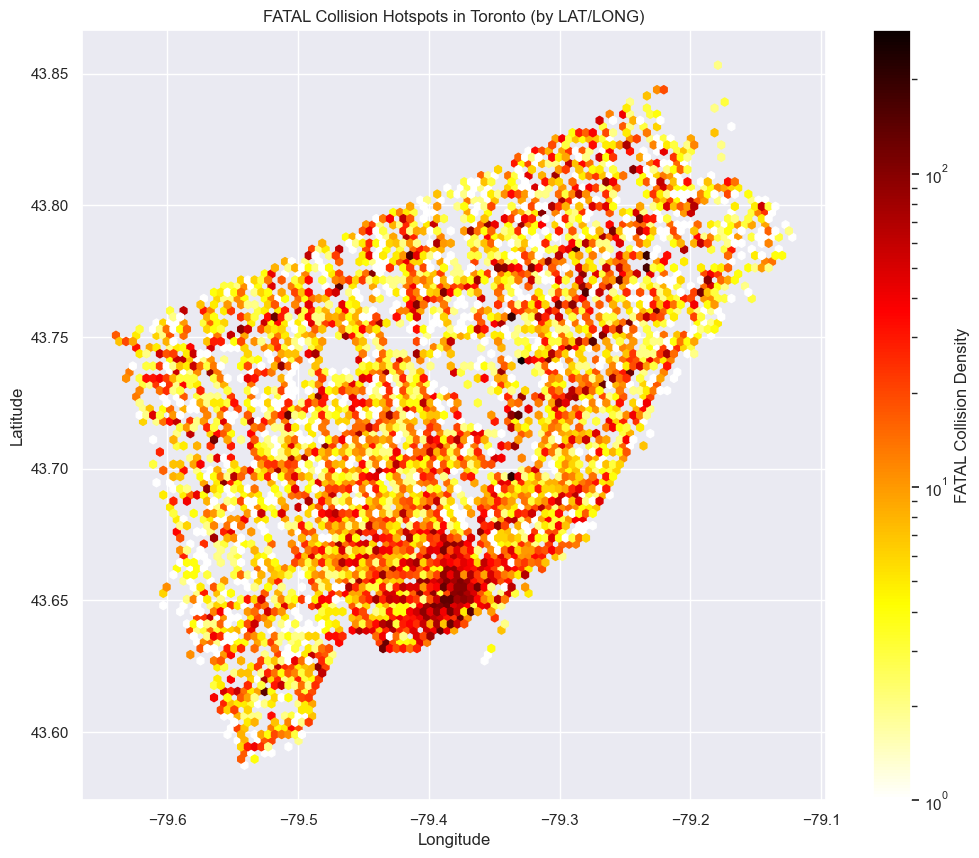

In [31]:
plt.figure(figsize=(12, 10))
plt.hexbin(injury_fatal_df['LONG'], injury_fatal_df['LAT'], gridsize=100, cmap='hot_r', bins='log')
plt.colorbar(label='FATAL Collision Density')
plt.title('FATAL Collision Hotspots in Toronto (by LAT/LONG)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [32]:
location_df = df[["LONG", "LAT"]]

In [33]:
location_df.shape

(591823, 2)

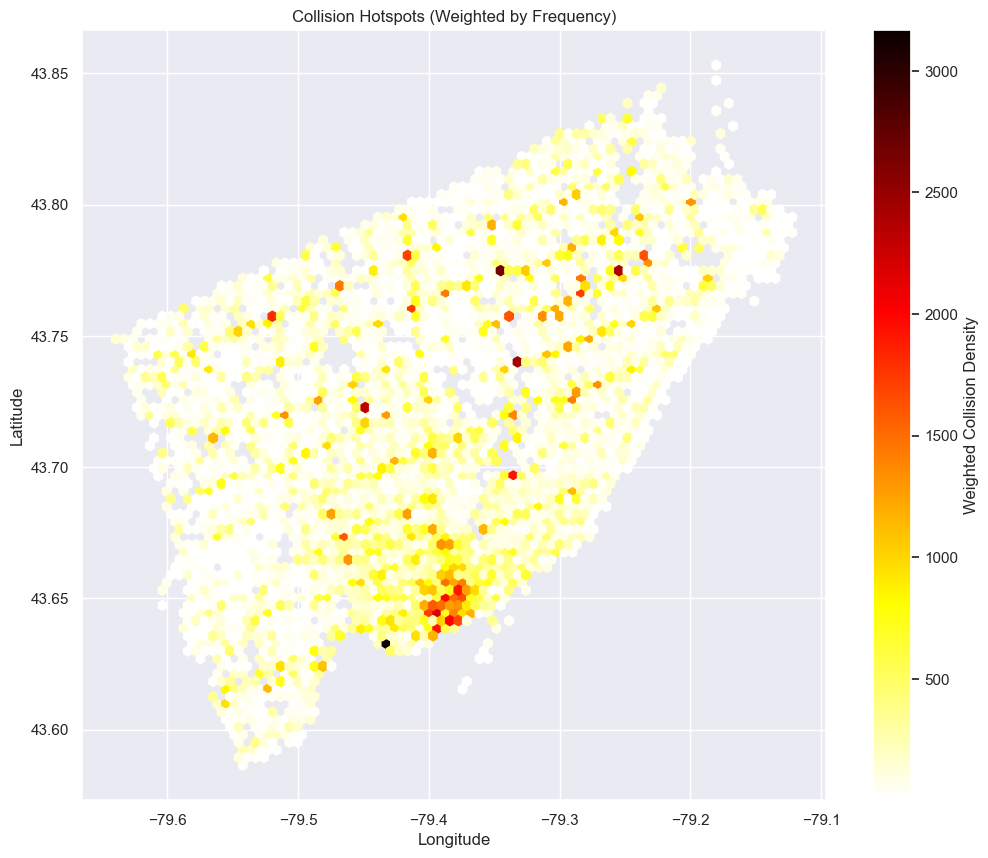

In [34]:
# Count how many collisions occur at each coordinate
location_counts = df.groupby(['LAT', 'LONG']).size().reset_index(name='count')

plt.figure(figsize=(12, 10))
plt.hexbin(
    location_counts['LONG'], location_counts['LAT'],
    C=location_counts['count'],  # weight by frequency
    gridsize=80,
    reduce_C_function=np.sum,    # aggregate counts within each hex
    cmap='hot_r'
)
plt.colorbar(label='Weighted Collision Density')
plt.title('Collision Hotspots (Weighted by Frequency)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [35]:
location_counts.sort_values("count")

,LAT,LONG,count
7573,43.694629,-79.265094,1
15922,43.779275,-79.295452,1
15919,43.779228,-79.154227,1
11555,43.732939,-79.571422,1
11557,43.732953,-79.609766,1
...,...,...,...
15675,43.775882,-79.343746,1576
7952,43.697606,-79.336364,1774
15741,43.776636,-79.254241,1870
10688,43.723657,-79.451306,2212


In [36]:
heat_data = [[row['LAT'], row['LONG'], row['count']]
             for _, row in location_counts.iterrows()]